

### Imports



In [ ]:
from PIL import Image, ImageFont, ImageDraw
import numpy
from pylab import *
import random
import os
import string
import json
import csv
import cv2
from google.colab.patches import cv2_imshow

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).





### Fill the docs with data

In [ ]:
# There should be 1 image in background folder 
background_path = "/content/drive/MyDrive/p2-Data/backgrounds"  # images path
font_path = "/content/drive/MyDrive/p2-Data/fonts"   # Font path
output_path = "/content/drive/MyDrive/p2-Data/visa cards/usa" # output file
num_images = 3000
show_bbox = False

In [ ]:

def fill_docs_with_data(text_font, c_font, data, info, draw) :
	card_title = ' ' #Doc title
	positions = [] #positions
	margin_top = 10
	margin_bottom = 30
	
	color = (0,0,0) 
	size = text_font.getsize(card_title) #sz
	x, y = (info[0]-size[0])/2, margin_top
	draw.text((x,y), card_title, color, font=text_font)
	
	Dy = (info[1]-margin_top-margin_bottom-size[1]-30) / 4
	Dy = 50 
	y = margin_top + size[1] + 60 #margins = 150 usa, 110 queensland,canada,pak, 200 china

	for key, val in data.items() :
		x = 10
		size_key = text_font.getsize(key)
		x = (info[0]-size[0])/2-200 # x axis 
		draw.text((x,y), key + ":", color, font=text_font)
		
		x += size_key[0]+10
		str = val
		options = 11
		cond = 10
		if options >= cond :
			cont = random.randint(0, len(str)-1)
			post = str[(cont+1):]
			draw.text((x,y), str[:cont], color, font=text_font)
			wpre, h = text_font.getsize(str[:cont])
			if len(str) > cont+1 :
				w, h = text_font.getsize(str)
				wpost, h = text_font.getsize(post)
				draw.text((x+w-wpost,y), str[cont+1:], color, font=text_font)
				
			dx = random.randint(-2,2)
			dy = random.randint(-2,2)
			while dx == 0 and dy == 0 :
				dx = random.randint(-2,2)
				dy = random.randint(-2,2)
			xc, yc = x+wpre+dx, y+dy
			draw.text((xc, yc), str[cont], color, font=text_font)
			wc, hc = text_font.getsize(str[cont])
			c_off = text_font.getoffset(str[cont])
			if xc+c_off[0]>=0 and yc+c_off[1]>=0 and xc+wc<info[0] and yc+hc<info[1] :
				positions.append([xc+c_off[0], yc+c_off[1], xc+wc, yc+hc])
				if show_bbox :
					draw.rectangle(positions[-1], outline = 'blue')
		else :
			draw.text((x,y), str, color, font=text_font)
		y += Dy
			
	return positions


fonts_tyles = os.listdir(font_path)
backgrounds = os.listdir(background_path)
csv_file = open('/content/drive/MyDrive/p2-Data/DATA.csv','r')


def print_docs(fonts_tyles, backgrounds, csv_file):
	pos_dict_list = []
	cards = csv.DictReader(csv_file)
	persons = []
	# save cards

	for person in cards :
		persons.append(person)


	for i in range(1,len(persons),1) : 
		if i >=num_images : 
			break
		if i % 1000 == 0 :
			print("i = {}".format(i))
		# Can change font style
		fontstyle = os.path.join(font_path, fonts_tyles[1]) 
		
		fontsize = 20 # random.randint(20,30)#
		font = ImageFont.truetype(fontstyle, fontsize)
		c_fontstyle = fontstyle
		c_fontsize = fontsize + random.randint(-2,2)
		c_font = ImageFont.truetype(c_fontstyle, c_fontsize)
		bg = os.path.join(background_path, backgrounds[random.randint(0,len(backgrounds)-1)])
		print(bg)
		if not '.jpg' in bg:
			continue
		im = Image.open(bg)
		im_info = im.size
		print(im_info)
		draw = ImageDraw.Draw(im)
		
		pos = fill_docs_with_data(font, c_font, dict(persons[i]), im_info, draw)
		
		file_name = "doc.{}.jpg".format(i)
		
		im.save(os.path.join(output_path, file_name),quality=95)
		#break
		pos_dict_list.append({'path':file_name, 'bbox':pos})

		f_name = "doc.{}.json".format(i)
		with open(os.path.join(output_path+'/json files', f_name),"w") as f :
			json.dump({'path':file_name, 'bbox':pos}, f)
	 
		with open(os.path.join(output_path, "annotation.json"),"w") as f :
			json.dump(pos_dict_list, f)
	

print_docs(fonts_tyles, backgrounds, csv_file)

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/p2-Data/backgrounds/USA.jpg
(600, 436)
/content/drive/MyDrive/p2-Data/backgrounds/USA.jpg
(600, 436)
/content/drive/MyDrive/p2-Data/backgrounds/USA.jpg
(600, 436)
/content/drive/MyDrive/p2-Data/backgrounds/USA.jpg
(600, 436)
/content/drive/MyDrive/p2-Data/backgrounds/USA.jpg
(600, 436)
/content/drive/MyDrive/p2-Data/backgrounds/USA.jpg
(600, 436)
/content/drive/MyDrive/p2-Data/backgrounds/USA.jpg
(600, 436)
/content/drive/MyDrive/p2-Data/backgrounds/USA.jpg
(600, 436)
/content/drive/MyDrive/p2-Data/backgrounds/USA.jpg
(600, 436)
/content/drive/MyDrive/p2-Data/backgrounds/USA.jpg
(600, 436)
/content/drive/MyDrive/p2-Data/backgrounds/USA.jpg
(600, 436)
/content/drive/MyDrive/p2-Data/backgrounds/USA.jpg
(600, 436)
/content/drive/MyDrive/p2-Data/backgrounds/USA.jpg
(600, 436)
/content/drive/MyDrive/p2-Data/backgrounds/USA.jpg
(600, 436)
/content/drive/MyDrive/p2-Data/backgrounds/USA.jpg
(600, 436)
/content/drive/MyDr

### Apply data augmentation



In [ ]:
# Data augmentation
def data_aug(image, technique, margin = 0.2, diff = False):
  
  if technique == "rotation":
    print("Data Aug Technique = Rotation")
    angle = 5
    
    # grab the dimensions of the image and then determine the
    # centre
    (h, w) = image.shape[:2]
    (cX, cY) = (w // 2, h // 2)

    # grab the rotation matrix (applying the negative of the
    # angle to rotate clockwise), then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])

    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))

    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY

    # perform the actual rotation and return the image
    image = cv2.warpAffine(image, M, (nW, nH))

    return image

  elif technique == "shearing":
    print("Data Aug Technique = Shearing")
    shear_factor = 0.1
    shear_factor = random.uniform(shear_factor,0.2)

    w,h = image.shape[1], image.shape[0]


    M = np.array([[1, abs(shear_factor), 0],[0,1,0]])

    nW =  image.shape[1] + abs(shear_factor*image.shape[0])


    image = cv2.warpAffine(image, M, (int(nW), image.shape[0]))


    image = cv2.resize(image, (w,h))

    scale_factor_x = nW / w

    return image

  elif technique == "scaling":
    print("Data Aug Technique = Scaling")
    if type(margin) == tuple:
      assert len(margin) == 2, "Invalid range"
      assert margin[0] > -1, "Scale factor can't be less than -1"
      assert margin[1] > -1, "Scale factor can't be less than -1"
    else:
      assert margin > 0, "Please input a positive float"
      margin = (max(-1, -margin), margin)
  
    img_shape = image.shape

    if diff:
      scale_x = random.uniform(*margin)
      scale_y = random.uniform(*margin)
    else:
      scale_x = random.uniform(*margin)
      scale_y = scale_x

    resize_scale_x = 1 + scale_x
    resize_scale_y = 1 + scale_y

    image=  cv2.resize(image, None, fx = resize_scale_x, fy = resize_scale_y)

    #bboxes[:,:4] *= [resize_scale_x, resize_scale_y, resize_scale_x, resize_scale_y]



    canvas = np.zeros(img_shape, dtype = np.uint8)

    y_lim = int(min(resize_scale_y,1)*img_shape[0])
    x_lim = int(min(resize_scale_x,1)*img_shape[1])

    print(y_lim, x_lim)

    canvas[:y_lim,:x_lim,:] =  image[:y_lim,:x_lim,:]

    image = canvas
    #bboxes = clip_box(bboxes, [0,0,1 + img_shape[1], img_shape[0]], 0.25)


    return image
    
  elif technique == "translation":
    print("Data Aug Technique = Translation")
    if type(margin) == tuple:
      assert len(margin) == 2, "Invalid range"  
      assert margin[0] > 0 and margin[0] < 1
      assert margin[1] > 0 and margin[1] < 1
    else:
      assert margin > 0 and margin < 1
      margin = (-margin, margin)
      
    #Chose a random digit to scale by 
    img_shape = image.shape
    
    #translate the image
    
    #percentage of the dimension of the image to translate
    translate_factor_x = random.uniform(*margin)
    translate_factor_y = random.uniform(*margin)
    
    if not diff:
      translate_factor_y = translate_factor_x
        
    canvas = np.zeros(img_shape).astype(np.uint8)


    corner_x = int(translate_factor_x*image.shape[1])
    corner_y = int(translate_factor_y*image.shape[0])
    
    #change the origin to the top-left corner of the translated box
    orig_box_cords =  [max(0,corner_y), max(corner_x,0), min(img_shape[0], corner_y + image.shape[0]), min(img_shape[1],corner_x + image.shape[1])]

    mask = image[max(-corner_y, 0):min(image.shape[0], -corner_y + img_shape[0]), max(-corner_x, 0):min(image.shape[1], -corner_x + img_shape[1]),:]
    canvas[orig_box_cords[0]:orig_box_cords[2], orig_box_cords[1]:orig_box_cords[3],:] = mask
    img = canvas
    
    #bboxes[:,:4] += [corner_x, corner_y, corner_x, corner_y]
    
    #bboxes = clip_box(bboxes, [0,0,img_shape[1], img_shape[0]], 0.25)
    
    return img #, bboxes

    


In [ ]:
# Color augmentaions
def color_aug(image, technique):
  contrast = 0.5
  brightness = 0

  if technique == "blur":
    print("Color Aug Technique = Blur")
    img = cv2.GaussianBlur(image, (3, 3), 0)

  elif technique == "saturation":
    print("Color Aug Technique = Saturation")
    saturation = 50
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    v = image[:, :, 2]
    v = np.where(v <= 255 - saturation, v + saturation, 255)
    image[:, :, 2] = v

    image = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
  elif technique == "contrast":
    print("Color Aug Technique = Contrast")
    contrast = 50
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    image[:,:,2] = [[max(pixel - contrast, 0) if pixel < 190 else min(pixel + contrast, 255) for pixel in row] for row in image[:,:,2]]
    image= cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
  elif technique == "brightness":
    image = cv2.addWeighted(image, 2, np.zeros(image.shape, image.dtype),0, 2)

  return image

In [ ]:
# save augmented docs

def save_tempered_docs(path):
  # Opening JSON file 
  for j in ["Pakistan"]: #,"Canada","QueensLand","USA"
    
    f = open(path+'/annotation.json',) 

    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 

    # Iterating through the json 
    # list
    count= 0
    for img_name in os.listdir(path):
      
        if count == 1500:
          break
        print("Processing : ", j, "  ", count , "/ ", 1500)
        count+=1
        if not ".jpg" in img_name:
            continue
        im=cv2.imread(path+"/"+img_name)
        ls = { i["path"]: i["bbox"]  for i  in data }
        f.close() 
        for i in ls[img_name]:
            x_min = int(i[1])
            y_min = int(i[0])
            x_max = int(i[3])
            y_max = int(i[2])
            im[ x_min:x_max, y_min:y_max]= im[ x_min:x_max, y_min:y_max]+np.random.randint(-100,100)  # Adding noise
            #cv2_imshow(im)
            

            # data augmentation
            techniques = ['rotation', 'shearing', 'scaling', 'translation']
            num = np.random.randint(len(techniques))
            print("----------- {} -----------".format(techniques[num]))
            im = data_aug(im, techniques[num])
            # color augmentation
            color_techniques = ['blur', 'saturation','contrast']
            print("-----------Color {} -----------".format(color_techniques[num-1]))
            im = color_aug(im, color_techniques[num-1])
            #cv2_imshow(im)
            #break
          
            
          
        # Save randomly tampered card
        cv2.imwrite(path+"/noised/"+img_name,im) 
    f.close()

path = '/content/drive/MyDrive/p2-Data/visa cards/usa'
save_tempered_docs(path)    


Streaming output truncated to the last 5000 lines.
-----------Color blur -----------
Color Aug Technique = Blur
----------- shearing -----------
Data Aug Technique = Shearing
-----------Color blur -----------
Color Aug Technique = Blur
----------- shearing -----------
Data Aug Technique = Shearing
-----------Color blur -----------
Color Aug Technique = Blur
----------- rotation -----------
Data Aug Technique = Rotation
-----------Color contrast -----------
Color Aug Technique = Contrast
----------- translation -----------
Data Aug Technique = Translation
-----------Color contrast -----------
Color Aug Technique = Contrast
----------- rotation -----------
Data Aug Technique = Rotation
-----------Color contrast -----------
Color Aug Technique = Contrast
Processing :  Pakistan    1311 /  1500
----------- translation -----------
Data Aug Technique = Translation
-----------Color contrast -----------
Color Aug Technique = Contrast
----------- translation -----------
Data Aug Technique = Tran

Data Aug Technique = Translation


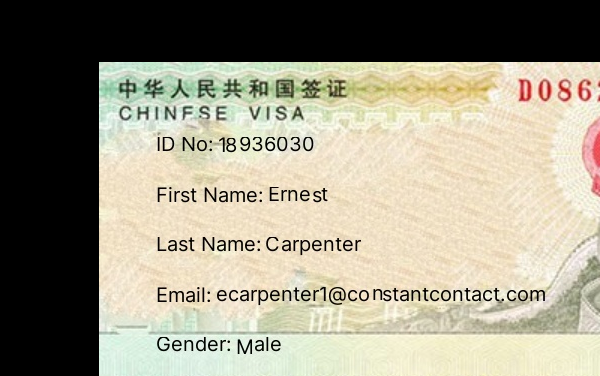

In [ ]:
img = cv2.imread('/content/drive/MyDrive/p2-Data/visa cards/china/doc.1.jpg')
color_techniques = ['blur', 'saturation','contrast', 'brightness']
techniques = ['rotation', 'shearing', 'scaling', 'translation']
num = np.random.randint(len(techniques))
img = data_aug(img,techniques[3])
#cv2_imshow(img)
#img = color_aug(img, color_techniques[3])
cv2_imshow(img)